In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
np.random.seed(42)

In [16]:
n = 500
data = {
    "TV_Ads": np.random.randint(1000, 20000, n),
    "Radio_Ads": np.random.randint(500, 10000, n),
    "Online_Ads": np.random.randint(1000, 15000, n),
    "Store_Size": np.random.randint(500, 5000, n),
}

# Sales is influenced by ads + store size + noise
data["Sales"] = (
    0.04 * data["TV_Ads"] +
    0.06 * data["Radio_Ads"] +
    0.08 * data["Online_Ads"] +
    0.5 * data["Store_Size"] +
    np.random.normal(0, 1000, n)  # noise
)

In [17]:
df = pd.DataFrame(data)

df

,TV_Ads,Radio_Ads,Online_Ads,Store_Size,Sales
0,2019,1630,4642,1316,-207.055872
1,11028,7063,12617,582,865.365721
2,13448,3158,2296,2420,2972.149214
3,13485,4000,13906,3991,5387.951369
4,2283,9066,9436,3644,3136.063231
...,...,...,...,...,...
495,6624,9577,9475,4955,3817.619815
496,8461,9975,14760,609,3569.351927
497,2819,1119,12120,691,1460.020250
498,11516,1382,5396,1403,3334.947373


# EDA 

In [18]:
df.describe()

,TV_Ads,Radio_Ads,Online_Ads,Store_Size,Sales
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10727.174000,5367.988000,8080.748000,2792.680000,2815.539209
std,5555.830208,2707.283405,4097.863473,1297.308482,1241.389416
min,1040.000000,506.000000,1018.000000,502.000000,-810.342115
25%,6054.750000,2949.750000,4535.750000,1597.500000,1963.865998
50%,10882.000000,5473.500000,8010.500000,2969.500000,2820.100992
75%,15388.000000,7662.250000,11846.000000,3894.000000,3712.650113
max,19994.000000,9996.000000,14926.000000,4990.000000,5761.422643


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TV_Ads      500 non-null    int32  
 1   Radio_Ads   500 non-null    int32  
 2   Online_Ads  500 non-null    int32  
 3   Store_Size  500 non-null    int32  
 4   Sales       500 non-null    float64
dtypes: float64(1), int32(4)
memory usage: 11.8 KB


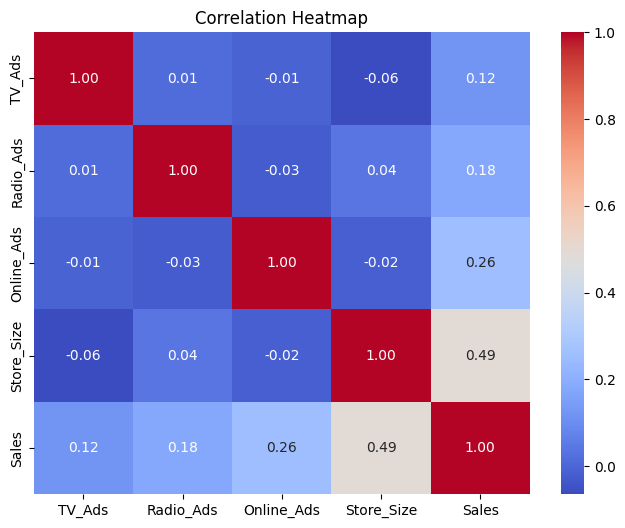

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

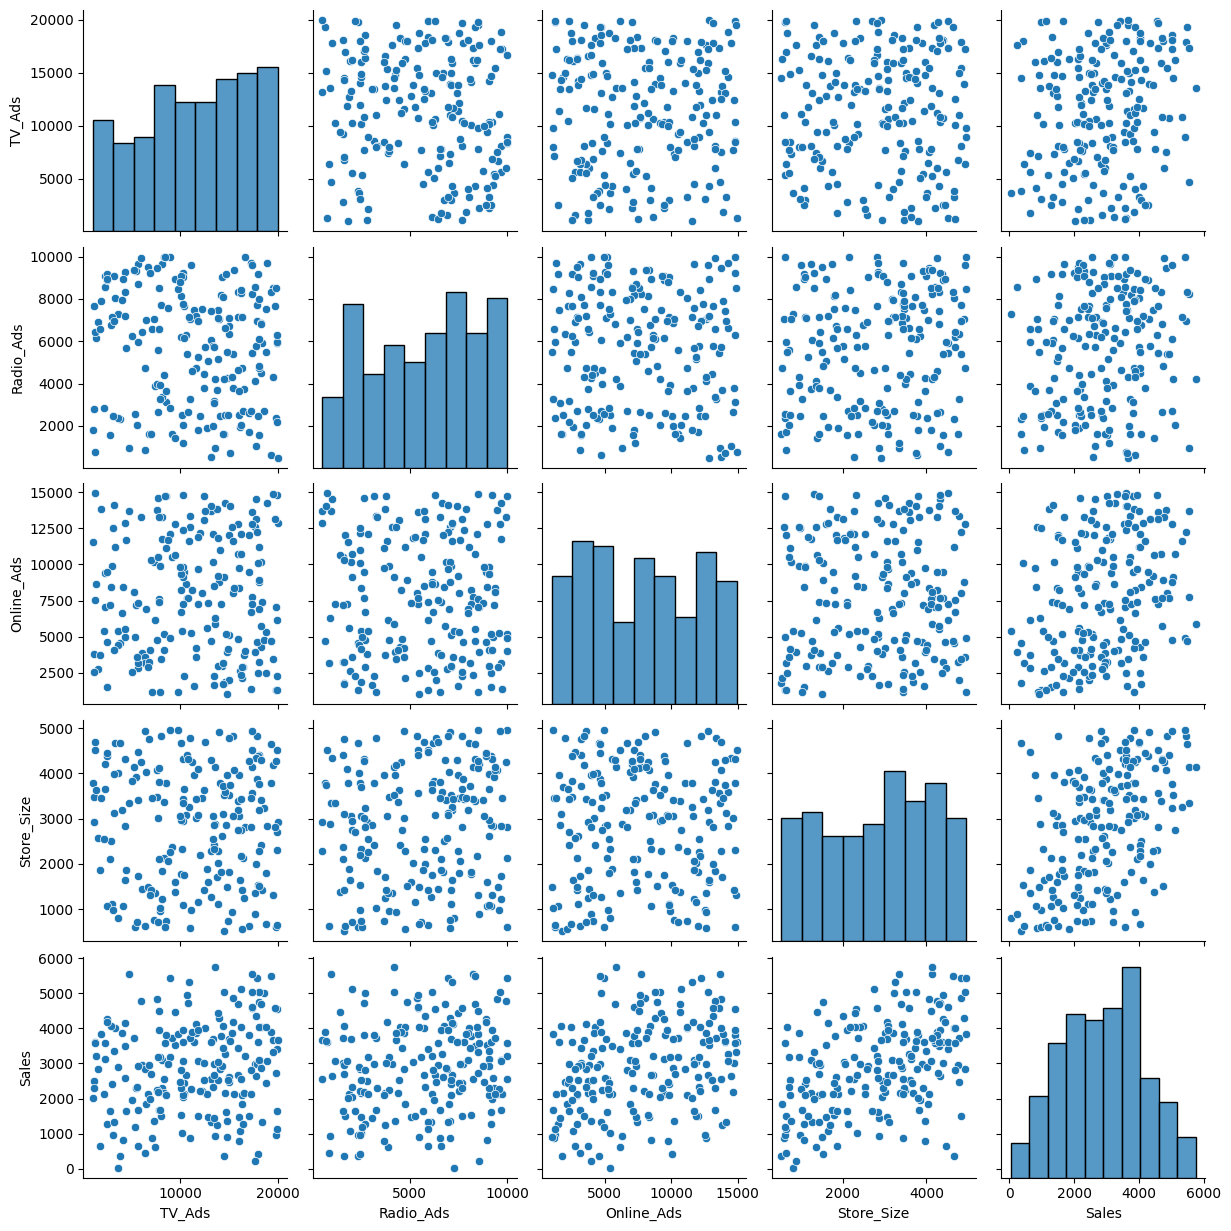

In [21]:
# Pairplot to see relationships
sns.pairplot(df.sample(200))  # sample for speed
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Features and target
X = df[["TV_Ads", "Radio_Ads", "Online_Ads", "Store_Size"]]
y = df["Sales"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)

In [31]:
print("RMSE:", rmse)
print("R² Score:", r2)

# Model coefficients
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeffs)

RMSE: 1021.4896163644567
R² Score: 0.46359787105151873
      Feature  Coefficient
0      TV_Ads     0.028223
1   Radio_Ads     0.071718
2  Online_Ads     0.085087
3  Store_Size     0.431680


In [32]:
new_data = pd.DataFrame({
    "TV_Ads": [10000],
    "Radio_Ads": [5000],
    "Online_Ads": [8000],
    "Store_Size": [2000]
})

predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 2411.295327606582


In [34]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [35]:
# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

# XGBoost
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

# Compare models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [rmse, rf_rmse, xgb_rmse],
    "R² Score": [r2, rf_r2, xgb_r2]
})

print(results)

               Model         RMSE  R² Score
0  Linear Regression  1021.489616  0.463598
1      Random Forest  1119.856287  0.355316
2            XGBoost  1205.563004  0.252859


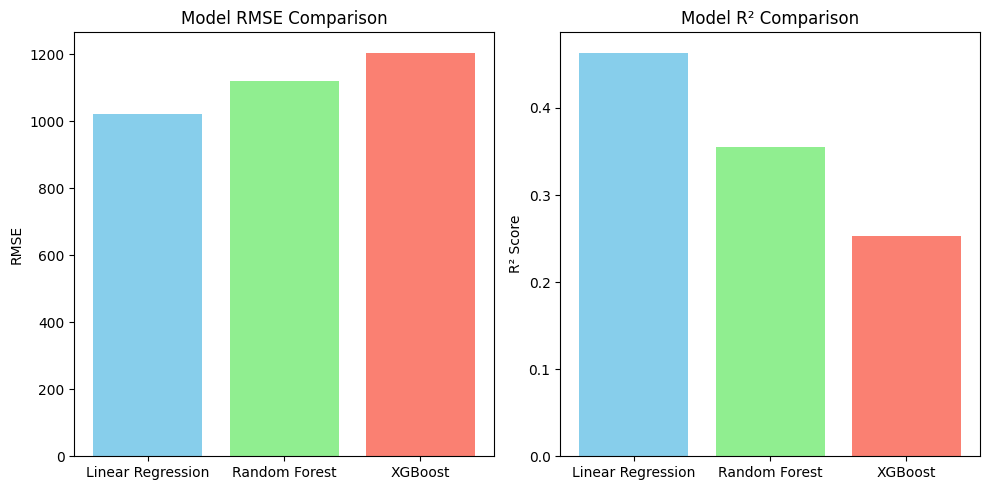

In [36]:
import matplotlib.pyplot as plt

# Comparison data
models = ["Linear Regression", "Random Forest", "XGBoost"]
rmse_values = [rmse, rf_rmse, xgb_rmse]
r2_values = [r2, rf_r2, xgb_r2]

plt.figure(figsize=(10,5))

# RMSE bar chart
plt.subplot(1,2,1)
plt.bar(models, rmse_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("RMSE")
plt.title("Model RMSE Comparison")

# R² Score bar chart
plt.subplot(1,2,2)
plt.bar(models, r2_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("R² Score")
plt.title("Model R² Comparison")

plt.tight_layout()
plt.show()


In [39]:
# Enter values manually
TV_Ads = 10000
Radio_Ads = 5000
Online_Ads = 8000
Store_Size = 2000

# Predict using your Linear Regression model
input_data = pd.DataFrame({
    "TV_Ads": [TV_Ads],
    "Radio_Ads": [Radio_Ads],
    "Online_Ads": [Online_Ads],
    "Store_Size": [Store_Size]
})

predicted_sales = model.predict(input_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Predicted Sales: 2286.74


In [40]:
df.to_csv("sales_data.csv", index=False)
